In [1]:
# Exploratory Data Analysis : 
# Segment the dataset and draw unique insights, including visualisation of the transaction volume and assessing the effect of any outliers.

# Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read Data

In [3]:
anz=pd.read_excel('D:\Data Science Projects 21-22\ANZ Forage\ANZ synthesised transaction dataset.xlsx')

In [4]:
anz.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [5]:
print("Data shape: ", anz.shape)

Data shape:  (12043, 23)


In [6]:
anz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

# Exploring Data

In [7]:
# Unique customers, unique transactions and 3 months of data

In [8]:
#Before we explore explore each column individually, let's check for the following:

# 100 unique customers (customer_id)
# Each row corresponds to a unique transaction ID (transaction_id)
# 3 months worth of data

In [9]:
print("Number of unique customer ID's: ", anz.customer_id.nunique())

Number of unique customer ID's:  100


In [10]:
print("Number of unique transaction ID's: ", anz.transaction_id.nunique())

Number of unique transaction ID's:  12043


In [11]:
anz.isnull().sum()

status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
dtype: int64

In [12]:
# Descriptive Statistics of features
anz.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [13]:
# Month wise Transaction Analysis

In [14]:
# Month wise transaction count
# Percentage of contribution from each months
# Month wise transaction amount
# Average transaction amount each month

### Transactions by Category

Text(0.5, 1.0, 'Number of transactions by category')

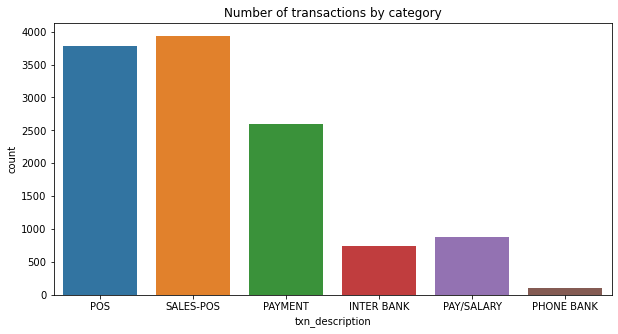

In [15]:
plt.figure(figsize = (10, 5))
sns.countplot(x='txn_description',data=anz)
plt.title("Number of transactions by category")

Text(0.5, 1.0, 'Average amount of transactions by category')

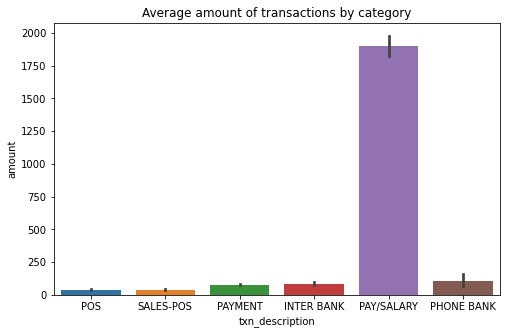

In [16]:
plt.figure(figsize = (8, 5))
sns.barplot(x = "txn_description", y = "amount", data = anz)
plt.title("Average amount of transactions by category")

Text(0.5, 1.0, 'Average amount of transactions by category')

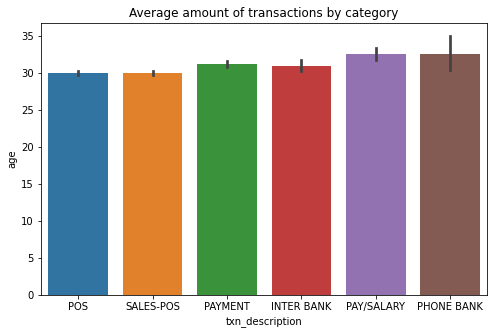

In [17]:
plt.figure(figsize = (8, 5))
sns.barplot(x = "txn_description", y = "age", data = anz)
plt.title("Average amount of transactions by category")

Text(0.5, 1.0, 'Average amount of transactions with respect to status')

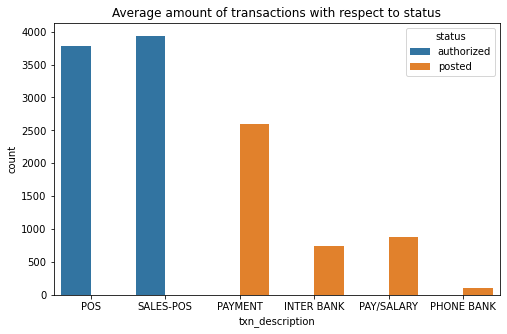

In [57]:
plt.figure(figsize = (8, 5))
sns.countplot(x = "txn_description", hue='status', data = anz)
plt.title("Average amount of transactions with respect to status")

Text(0.5, 1.0, 'Average amount of transactions by category')

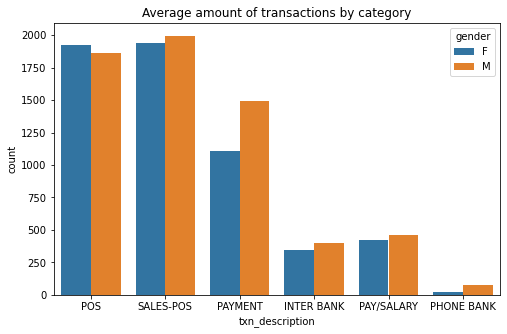

In [19]:
plt.figure(figsize = (8, 5))
sns.countplot(x = "txn_description", hue='gender', data = anz)
plt.title("Average amount of transactions by category")

## Month Analysis

In [20]:
# converting the date column to pandas Timestap
anz['date'] = pd.to_datetime(anz['date'])


In [21]:
# extracting day name 

anz['day_name'] = anz['date'].dt.day_name()
anz['day_name'].head()

0    Wednesday
1    Wednesday
2    Wednesday
3    Wednesday
4    Wednesday
Name: day_name, dtype: object

In [22]:
# extracting month name

anz['month_name'] = anz['date'].dt.month_name()
anz['month_name'].head()


0    August
1    August
2    August
3    August
4    August
Name: month_name, dtype: object

Text(0.5, 0, 'Month')

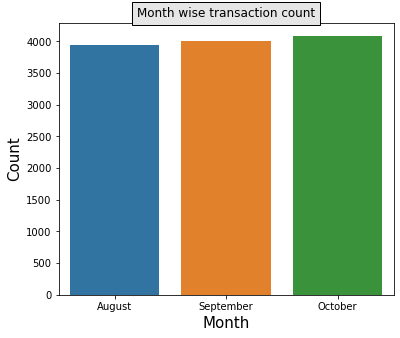

In [23]:
plt.figure(figsize=(6,5))
plt.title("Month wise transaction count",bbox={'facecolor':'0.9', 'pad':5})
sns.countplot(x='month_name' , data=anz)
plt.ylabel("Count",fontsize=15)
plt.xlabel("Month",fontsize=15)

Text(0.5, 0, 'Month')

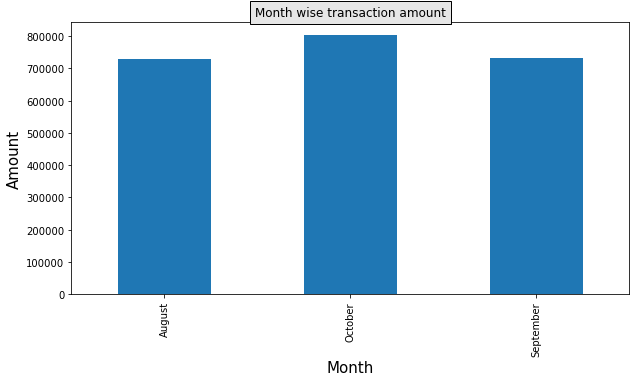

In [24]:
# Visualize month wise transaction amount
plt.figure(figsize = (10,5))
anz.groupby('month_name').amount.sum().plot(kind='bar')
plt.title("Month wise transaction amount",bbox={'facecolor':'0.9', 'pad':5})
plt.ylabel("Amount",fontsize=15)
plt.xlabel("Month",fontsize=15)

## Transactions by Gender

In [25]:
anz.gender.value_counts()

M    6285
F    5758
Name: gender, dtype: int64

Text(0.5, 1.0, 'Number of transactions by gender')

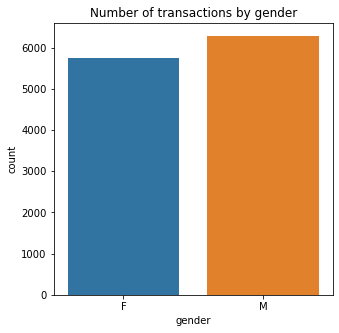

In [26]:
plt.figure(figsize = (5, 5))
sns.countplot(x='gender',data=anz)
plt.title("Number of transactions by gender")

Text(0.5, 1.0, 'Average amount of transactions by gender')

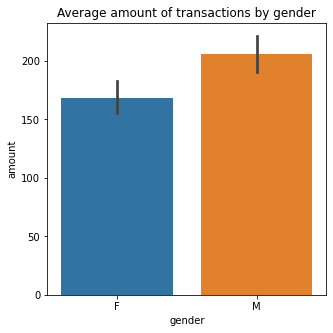

In [27]:
plt.figure(figsize = (5, 5))
sns.barplot(x='gender',y='amount',data=anz)
plt.title("Average amount of transactions by gender")

Text(0.5, 1.0, 'Percentage of contribution from gender')

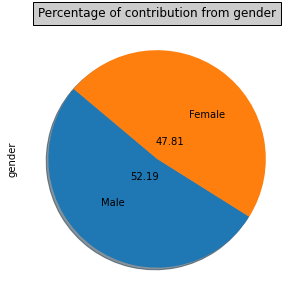

In [28]:
plt.figure(figsize=(5,5))
anz['gender'].value_counts(normalize=True).plot.pie(autopct='%.2f',labels=['Male',
                                                                         'Female'], labeldistance=0.5 ,
                                                   shadow=True, startangle=140,pctdistance=0.2 , radius=1)
plt.title('Percentage of contribution from gender' , bbox={'facecolor':'0.8', 'pad':5})

Text(0, 0.5, 'Count')

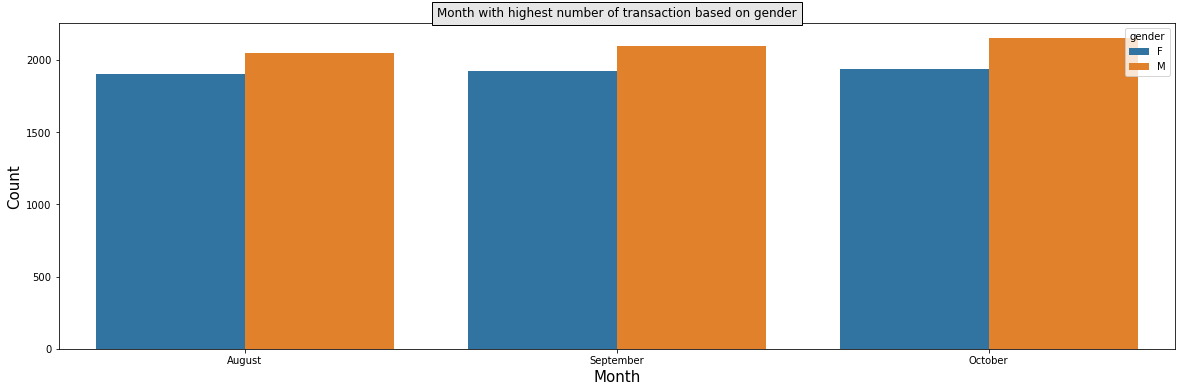

In [29]:
# visualize month with highest number of transaction based on gender

plt.figure(figsize=(20,6))
sns.countplot(x='month_name' ,hue='gender', data=anz)
plt.title('Month with highest number of transaction based on gender',bbox={'facecolor':'0.9', 'pad':5})
plt.xlabel("Month",fontsize=15)
plt.ylabel("Count",fontsize=15)

## Day wise Transaction Analysis

Text(0.5, 0, 'Day')

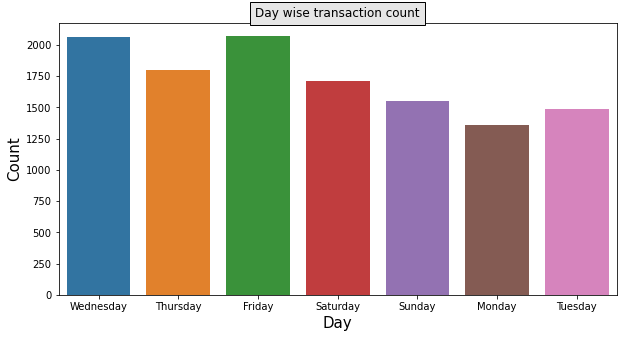

In [30]:
# visualize day wise transaction count

plt.figure(figsize=(10,5))
sns.countplot(x='day_name' , data=anz)
plt.title("Day wise transaction count",bbox={'facecolor':'0.9', 'pad':5})
plt.ylabel("Count",fontsize=15)
plt.xlabel("Day",fontsize=15)

Text(0.5, 1.0, 'Average amount of transactions based on Days')

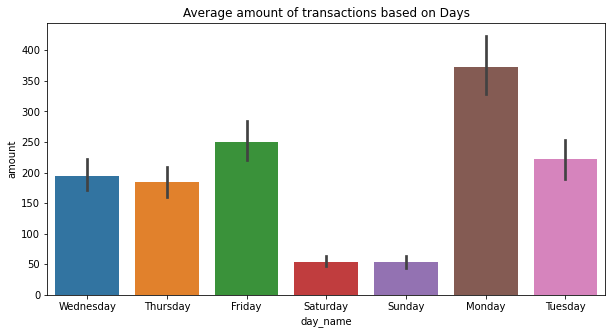

In [31]:
# visualize day-wise highest number of transactions based on total amount

plt.figure(figsize = (10, 5))
sns.barplot(x='day_name',y='amount',data=anz)
plt.title("Average amount of transactions based on Days")

Text(0, 0.5, 'Count')

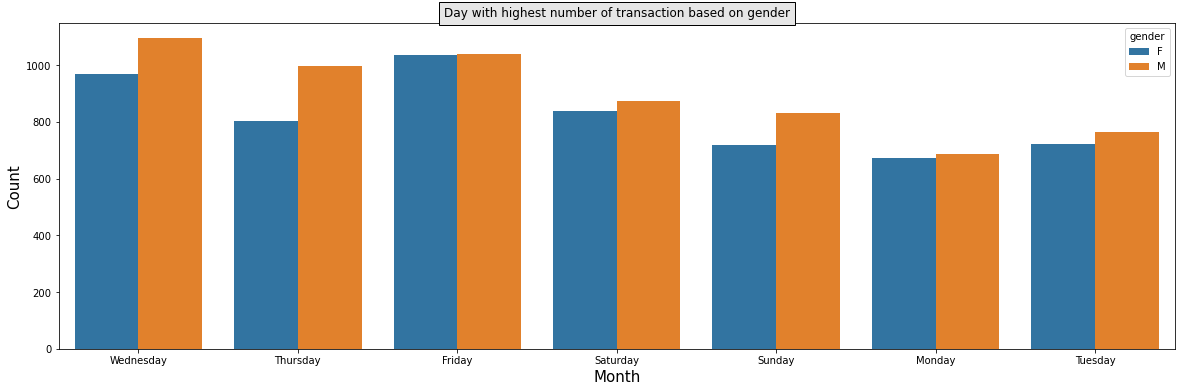

In [32]:
# visualize day-wise highest number of transaction based on gender

plt.figure(figsize=(20,6))
sns.countplot(x='day_name' ,hue='gender', data=anz)
plt.title('Day with highest number of transaction based on gender',bbox={'facecolor':'0.9', 'pad':5})
plt.xlabel("Month",fontsize=15)
plt.ylabel("Count",fontsize=15)

## Age wise transaction analysis


Text(0.5, 6.79999999999999, 'Age')

<Figure size 1080x360 with 0 Axes>

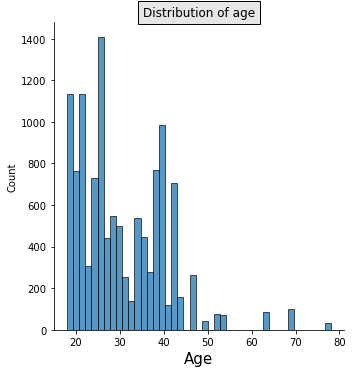

In [33]:
# visualize distribution of age

plt.figure(figsize=(15,5))
age1=anz['age']
sns.displot(age1);
plt.title('Distribution of age',bbox={'facecolor':'0.9', 'pad':5})
plt.xlabel('Age',fontsize=15)

Text(0, 0.5, 'Balance')

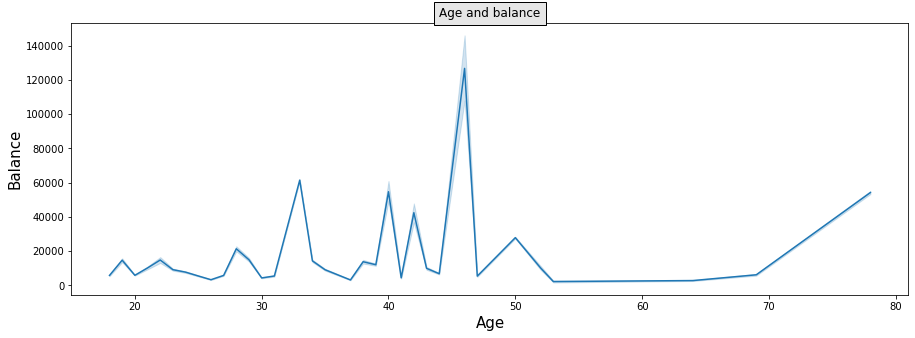

In [34]:
# visualize age with balance

plt.figure(figsize=(15,5))
sns.lineplot(x='age' , y='balance' , data=anz)
plt.title('Age and balance',bbox={'facecolor':'0.9', 'pad':5})
plt.xlabel('Age',fontsize=15)
plt.ylabel('Balance',fontsize=15)

Text(0, 0.5, 'Amount')

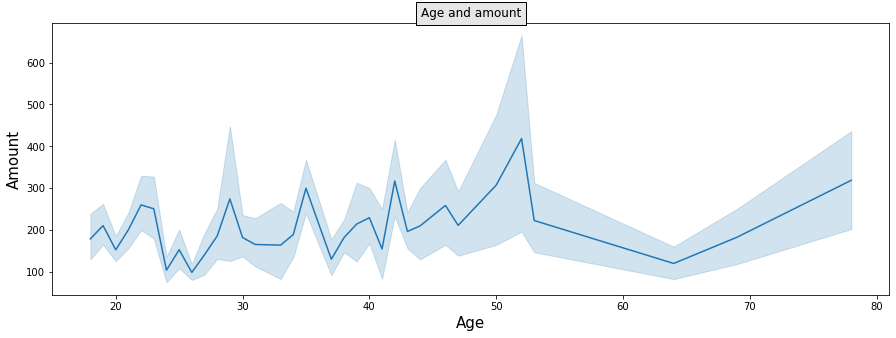

In [35]:
# visualize age with amount

plt.figure(figsize=(15,5))
sns.lineplot(x='age' , y='amount' , data=anz)
plt.title('Age and amount',bbox={'facecolor':'0.9', 'pad':5})
plt.xlabel('Age',fontsize=15)
plt.ylabel('Amount',fontsize=15)

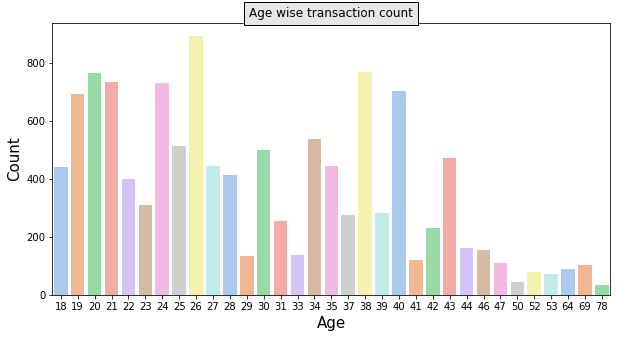

In [36]:
plt.figure(figsize = (10, 5))
ax = sns.countplot(x = 'age', data = anz, palette = 'pastel')
ax.set_title(label = 'Age wise transaction count',bbox={'facecolor':'0.9', 'pad':5})
ax.set_ylabel(ylabel = 'Count', fontsize = 15)
ax.set_xlabel(xlabel = 'Age', fontsize = 15)
plt.show()


Text(0.5, 0, 'Age')

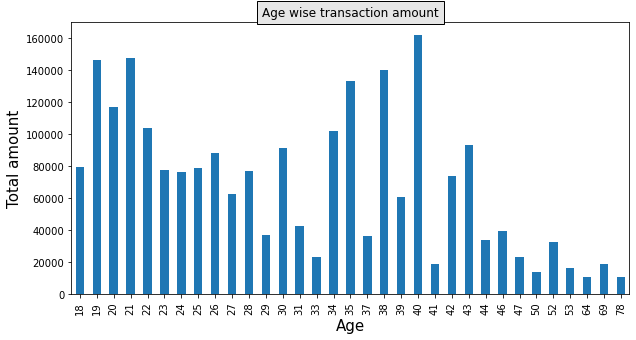

In [37]:
# visualize age wise transaction amount

plt.figure(figsize = (10,5))
anz.groupby('age').amount.sum().plot(kind='bar')
plt.title("Age wise transaction amount",bbox={'facecolor':'0.9', 'pad':5})
plt.ylabel("Total amount",fontsize=15)
plt.xlabel("Age",fontsize=15)

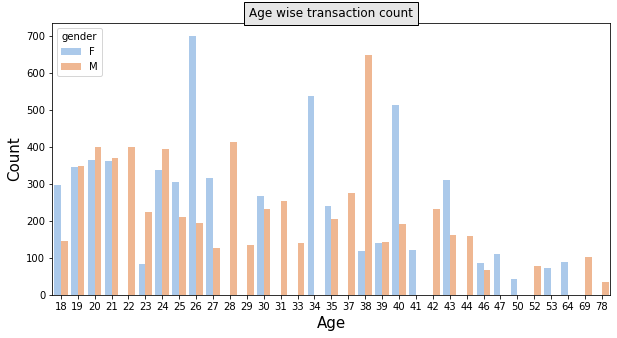

In [38]:
plt.figure(figsize = (10, 5))
ax = sns.countplot(x = 'age', hue='gender',data = anz, palette = 'pastel')
ax.set_title(label = 'Age wise transaction count',bbox={'facecolor':'0.9', 'pad':5})
ax.set_ylabel(ylabel = 'Count', fontsize = 15)
ax.set_xlabel(xlabel = 'Age', fontsize = 15)
plt.show()

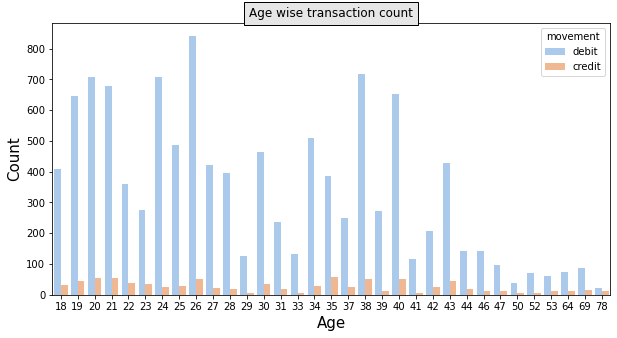

In [39]:
plt.figure(figsize = (10, 5))
ax = sns.countplot(x = 'age', hue='movement',data = anz, palette = 'pastel')
ax.set_title(label = 'Age wise transaction count',bbox={'facecolor':'0.9', 'pad':5})
ax.set_ylabel(ylabel = 'Count', fontsize = 15)
ax.set_xlabel(xlabel = 'Age', fontsize = 15)
plt.show()

# State wise transaction analysis

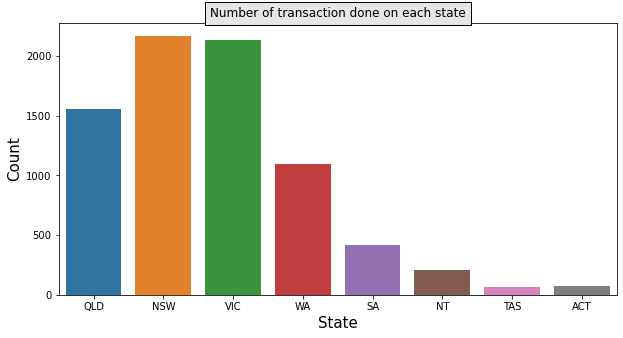

In [40]:
# visualize state wise transaction count

plt.figure(figsize=(10,5))
sns.countplot(x='merchant_state',data=anz)
plt.title('Number of transaction done on each state',bbox={'facecolor':'0.9', 'pad':5})
plt.ylabel("Count",fontsize=15)
plt.xlabel("State",fontsize=15)
plt.show()

In [41]:
print(anz['movement'].groupby(anz["merchant_state"]).value_counts(sort=True))


merchant_state  movement
ACT             debit         73
NSW             debit       2169
NT              debit        205
QLD             debit       1556
SA              debit        415
TAS             debit         68
VIC             debit       2131
WA              debit       1100
Name: movement, dtype: int64


In [42]:
print(anz['gender'].groupby(anz["merchant_state"]).value_counts(sort=True))


merchant_state  gender
ACT             F           46
                M           27
NSW             M         1189
                F          980
NT              F          200
                M            5
QLD             F          800
                M          756
SA              F          245
                M          170
TAS             M           52
                F           16
VIC             M         1213
                F          918
WA              F          657
                M          443
Name: gender, dtype: int64


In [43]:
print(anz['status'].groupby(anz["merchant_state"]).value_counts(sort=True))


merchant_state  status    
ACT             authorized      73
NSW             authorized    2169
NT              authorized     205
QLD             authorized    1556
SA              authorized     415
TAS             authorized      68
VIC             authorized    2131
WA              authorized    1100
Name: status, dtype: int64


Text(0.5, 1.0, 'Number of transaction in a state')

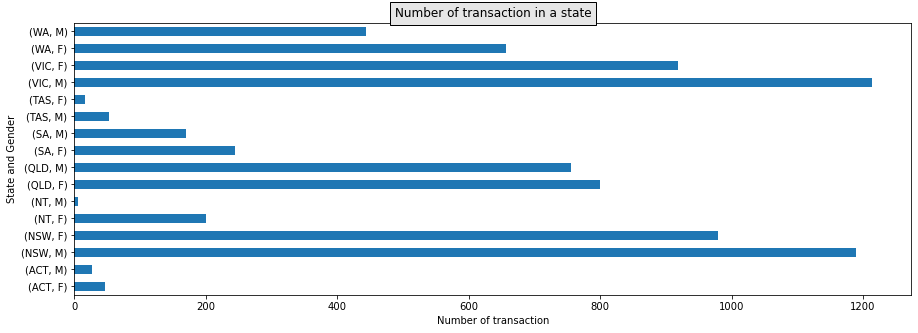

In [44]:
# visualize number of transaction in merchant state by gender

gen_mer_state = anz['gender'].groupby(anz["merchant_state"]).value_counts(sort=True)
fig,ax = plt.subplots(figsize=(15,5))
gen_mer_state.plot.barh()
ax.set(xlabel="Number of transaction",
      ylabel="State and Gender")
plt.title('Number of transaction in a state',bbox={'facecolor':'0.9', 'pad':5})


In [45]:
mer_state_grp = anz.groupby(['merchant_state'])
print(mer_state_grp['gender'].value_counts(normalize=True))

merchant_state  gender
ACT             F         0.630137
                M         0.369863
NSW             M         0.548179
                F         0.451821
NT              F         0.975610
                M         0.024390
QLD             F         0.514139
                M         0.485861
SA              F         0.590361
                M         0.409639
TAS             M         0.764706
                F         0.235294
VIC             M         0.569216
                F         0.430784
WA              F         0.597273
                M         0.402727
Name: gender, dtype: float64


In [46]:
agg_amt_state = mer_state_grp['amount'].agg(['min' , 'mean' , 'max'])


In [47]:
my_colors = ['r','b','k','y','m','c','#16A085','salmon' , '#32e0c4']

merchant_state
ACT    4.50
NSW    0.10
NT     1.71
QLD    0.10
SA     3.28
TAS    7.35
VIC    0.10
WA     2.05
Name: min, dtype: float64


Text(0.5, 1.0, 'Minimum Number of transaction in a state')

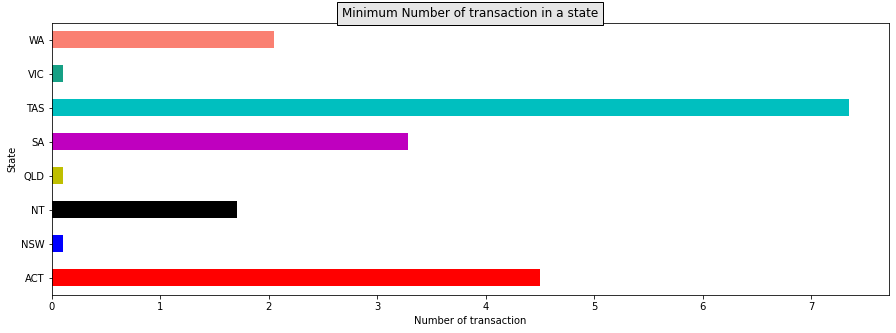

In [48]:
# visualize minimum amount transacted in each state

fig,ax = plt.subplots(figsize=(15,5)) # (height,width)
print(agg_amt_state['min'])
agg_amt_state['min'].plot.barh(color=my_colors)
ax.set(xlabel="Number of transaction",
      ylabel="State")
plt.title('Minimum Number of transaction in a state',bbox={'facecolor':'0.9', 'pad':5})

merchant_state
ACT    1348.47
NSW    4233.00
NT     1285.09
QLD    7081.09
SA      909.61
TAS     133.31
VIC    3680.71
WA     1692.56
Name: max, dtype: float64


Text(0.5, 1.0, 'Maximum amount transacted in each state')

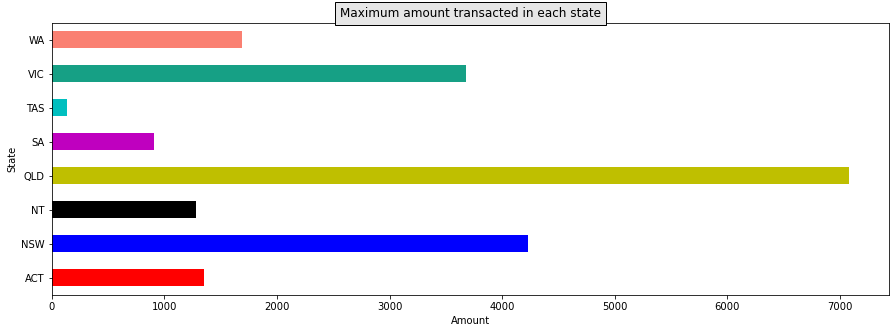

In [49]:
# visualize maximum amount transacted in each state

fig,ax = plt.subplots(figsize=(15,5)) # (height,width)
print(agg_amt_state['max'])
agg_amt_state['max'].plot.barh(color=my_colors)
ax.set(xlabel="Amount",
      ylabel="State")
plt.title('Maximum amount transacted in each state',bbox={'facecolor':'0.9', 'pad':5})

# Transaction movement

In [50]:
daily_amount = pd.DataFrame(anz.groupby("date").amount.sum())
daily_amount.head()

,amount
date,
2018-08-01,29867.94
2018-08-02,21786.32
2018-08-03,38096.58
2018-08-04,6296.05
2018-08-05,4426.50


Text(0, 0.5, 'Transaction volume')

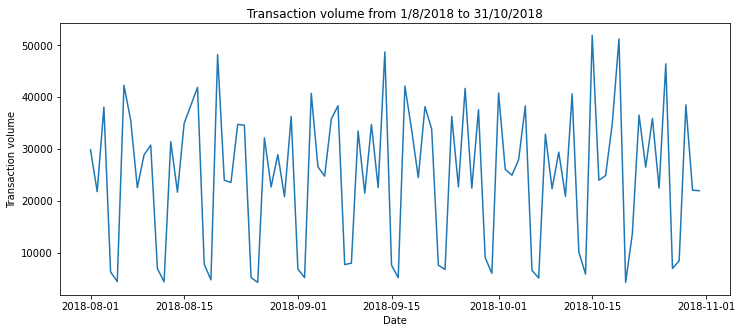

In [51]:
fig, ax = plt.subplots(figsize = (12, 5))
ax.plot(daily_amount.index, daily_amount.amount)
plt.title("Transaction volume from 1/8/2018 to 31/10/2018")
plt.xlabel("Date")
plt.ylabel("Transaction volume")

In [52]:
anz["extraction"] = pd.to_datetime(anz["extraction"])
anz['hour']= anz.extraction.dt.hour

In [53]:
# visualize the transactions by hour

average_hourly_volume = pd.DataFrame(anz.groupby("hour").amount.mean())
average_hourly_volume.head()

,amount
hour,
0,28.274907
1,48.716402
2,75.269764
3,84.725918
4,61.301845


Text(0.5, 0, 'Hour')

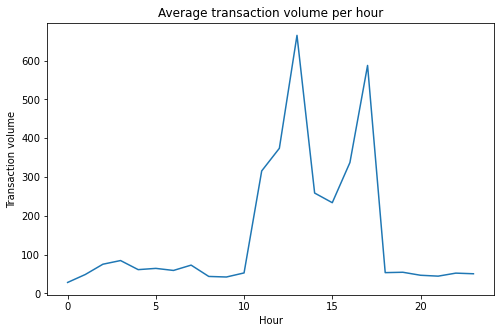

In [54]:
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(average_hourly_volume.index, average_hourly_volume.amount)
plt.title("Average transaction volume per hour")
plt.ylabel("Transaction volume")
plt.xlabel("Hour")

Text(0.5, 1.0, 'Movement type')

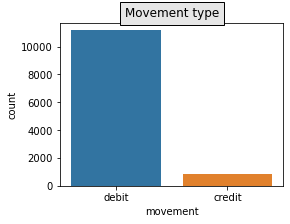

In [55]:
# visualize movement type

plt.figure(figsize=(4,3))
sns.countplot(x='movement',data=anz)
ax.set(xlabel="Movement",
      ylabel="Count")
plt.title('Movement type',bbox={'facecolor':'0.9', 'pad':5})

Text(0.5, 1.0, 'Transaction movement type by gender')

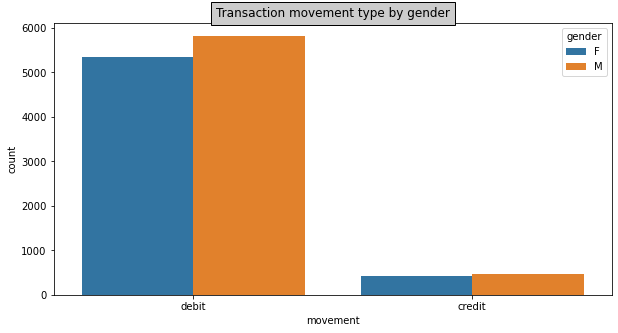

In [56]:
# visualize transaction movement by gender

plt.figure(figsize=(10,5))
sns.countplot(x='movement',hue='gender',data=anz,)
plt.title('Transaction movement type by gender',bbox={'facecolor':'0.8', 'pad':5})

# Key Findings

In [58]:

# 1.	Pay/Salary has more number of transactions, POS, SALES-POS category has more number of authorized transactions.
# 2.	October month has more number of transactions.
# 3.	Compared to female, Male has contributed more number of transactions.
# 4.	More number of transactions occurs on Monday and Friday.
# 5.	The age group between 20-30 did more purchases
# 6.	NSW and VIC saw more number of sales
# 7.	QLD state people has bought more products.

